<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/340_summarize_posterior.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(sec-sintesi-distr-post)=
# Sintesi a posteriori

In questo capitolo, ci focalizzeremo sulla sintesi dell'informazione contenuta nella distribuzione a posteriori, che rappresenta il nostro grado di incertezza riguardo al parametro o parametri incogniti oggetto dell'inferenza.

La distribuzione a posteriori contiene tutte le informazioni disponibili sui possibili valori del parametro. Quando ci si trova di fronte a un parametro monodimensionale o bidimensionale, possiamo rappresentare la distribuzione a posteriori tramite un grafico $p(\theta \mid y)$. Tuttavia, quando abbiamo a che fare con vettori di parametri con più di due dimensioni, è utile effettuare una sintesi numerica della distribuzione a posteriori. Le statistiche descrittive comuni, come media, mediana, moda, varianza, deviazione standard e i quantili, possono essere utilizzate per ottenere una sintesi numerica della distribuzione a posteriori. Queste statistiche ci permettono di estrarre informazioni rilevanti, soprattutto quando la rappresentazione grafica diventa complessa o poco interpretabile. La stima puntuale della tendenza centrale della distribuzione a posteriori ci fornisce il "valore più credibile" del parametro. In altre parole, corrisponde al valore stimato che è il più probabile dato il campione di dati osservati. D'altro canto, l'intervallo di credibilità ci dà un'indicazione dell'ampiezza dell'intervallo che contiene una determinata quota della massa della distribuzione a posteriori del parametro. Questo intervallo ci offre informazioni riguardo alla nostra incertezza relativa al valore del parametro: quanto più ampio è l'intervallo tanto maggiore è l'incertezza.

In conclusione, la distribuzione a posteriori è un potente strumento per la sintesi dell'informazione dai dati raccolti e rappresenta la nostra conoscenza aggiornata riguardo ai parametri incogniti. L'utilizzo di statistiche descrittive e l'analisi degli intervalli di credibilità ci permettono di ottenere un quadro completo e interpretabile della distribuzione a posteriori e delle nostre inferenze sul parametro di interesse.

In [11]:
import numpy as np
import arviz as az
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Stima puntuale

Per ottenere una stima puntuale del parametro $\theta$ dalla distribuzione a posteriori, si utilizzano comunemente tre statistiche: la moda, la mediana e la media, a seconda della forma e del tipo di distribuzione a cui ci si trova di fronte.

La media a posteriori rappresenta il valore atteso del parametro, calcolato in base alla distribuzione a posteriori. La moda, invece, corrisponde al valore più credibile del parametro, ovvero quello che massimizza la distribuzione a posteriori. Essa è anche nota come "massimo a posteriori" (MAP). Tuttavia, va sottolineato che se la distribuzione a posteriori è multimodale, la moda potrebbe non essere il valore più credibile in quanto potrebbero esserci più picchi di probabilità. La mediana, invece, rappresenta il valore del parametro per il quale il 50% della massa di probabilità a posteriori si trova su entrambi i lati. Per valutare la variabilità del parametro, si calcola la varianza a posteriori, utilizzando la formula della varianza nota rispetto alla tendenza centrale data dalla media a posteriori. La radice quadrata della varianza a posteriori ci fornisce la deviazione standard a posteriori, che misura l'incertezza a posteriori relativa al parametro di interesse, espressa nella stessa unità di misura dei dati.

Quando si utilizzano le procedure bayesiane basate su metodi MCMC (Monte Carlo Markov Chain), si ottengono un numero finito di campioni dalla distribuzione stazionaria, introducendo un ulteriore livello di incertezza nella stima del parametro. L'errore standard della stima (Monte Carlo standard error, MCSE) misura l'accuratezza della simulazione. Importante notare che la deviazione standard a posteriori e l'errore standard della stima sono due concetti distinti: la prima descrive l'incertezza riguardante il parametro, basata sulla larghezza della distribuzione a posteriori e legata alla dimensione del campione, mentre il secondo riflette l'incertezza dovuta alla simulazione MCMC e dipende dal numero di iterazioni effettuate nella simulazione.

In sintesi, mediante le statistiche descrittive della moda, mediana e media a posteriori, insieme alla varianza e deviazione standard a posteriori, possiamo ottenere una stima completa e dettagliata del parametro di interesse, considerando anche l'incertezza introdotta dalle simulazioni MCMC nell'ambito delle procedure bayesiane.

## Intervallo di credibilità

Nella statistica bayesiana, è comune accompagnare la stima puntuale con una stima intervallare, specialmente quando il parametro $\theta \in \Theta$ è monodimensionale. In questo caso, chiamiamo "intervallo di credibilità" un intervallo di valori $I_{\alpha}$ che contiene la proporzione $1 - \alpha$ della massa di probabilità della distribuzione a posteriori:

$$
p(\Theta \in I_{\alpha} \mid y) = 1 - \alpha.
$$

L'obiettivo dell'intervallo di credibilità è esprimere il nostro grado di incertezza riguardo alla stima del parametro $\theta$. Quando il parametro $\theta$ è multidimensionale, invece, si parla di "regione di credibilità".

Va sottolineato che l'equazione sopra non determina un unico intervallo di credibilità di ordine $(1 - \alpha) \cdot 100\%$. In realtà, esistono un numero infinito di tali intervalli. Di conseguenza, è necessario definire alcune condizioni aggiuntive per la scelta dell'intervallo di credibilità. Vediamo due delle condizioni aggiuntive più comuni:

1. *Intervallo di credibilità simmetrico:* Questa condizione richiede che l'intervallo di credibilità sia simmetrico rispetto al punto di stima puntuale. In altre parole, se $\hat{\theta}$ è il valore stimato del parametro, allora l'intervallo di credibilità sarà della forma $(\hat{\theta} - a, \hat{\theta} + a)$, dove $a$ è un valore positivo appropriato. Un intervallo di credibilità simmetrico a livello $\alpha$ è un intervallo
$
I_{\alpha} = [q_{\alpha/2}, 1 - q_{\alpha/2}],
$
dove $q_z$ è un quantile della distribuzione a posteriori. Per esempio, l'intervallo di credibilità a code uguali al 94% è un intervallo
$
I_{0.06} = [q_{0.03}, q_{0.97}]
$
che lascia il 3% della massa di densità a posteriori in ciascuna coda.

2. *Intervallo di credibilità più corto:* In questo caso, l'intervallo di credibilità viene scelto in modo che abbia la larghezza più piccola possibile tra tutti gli intervalli di ordine $(1 - \alpha) \cdot 100\%$. Questo intervallo rappresenta la stima più precisa possibile del parametro $\theta$. Nell'intervallo di credibilità simmetrico alcuni valori del parametro che sono inclusi nell'intervallo possono avere una credibilità a posteriori più bassa rispetto a quelli esterni all'intervallo. L'intrevallo di credibilità più corto, o *a densità a posteriori più alta* (in inglese *High Posterior Density Interval*, HPD), è invece costruito in modo tale da assicurare di includere nell'intervallo tutti i valori $\theta$ che sono a posteriori maggiormente credibili. Graficamente questo intervallo può essere ricavato tracciando una linea orizzontale sulla rappresentazione della distribuzione a posteriori e regolando l'altezza della linea in modo tale che l'area sottesa alla curva sia pari a $1 - \alpha$. Questo tipo di intervallo è il più stretto possibile, tra tutti i possibili intervalli di credibilità allo stesso livello di fiducia. Se la distribuzione a posteriori è simmetrica unimodale, l'intervallo di credibilità più corto corrisponde all'intervallo di credibilità simmetrico.

### Interpretazione

L'interpretazione dell'intervallo di credibilità è intuitiva e diretta: rappresenta un intervallo di valori all'interno del quale si ritiene con un determinato livello di probabilità soggettiva che il parametro incognito (ad esempio, la dimensione dell'effetto di un trattamento) possa cadere. In altre parole, dopo aver analizzato i dati, abbiamo una certa fiducia soggettiva riguardo al fatto che il valore del parametro si trovi all'interno dell'intervallo calcolato.

Il concetto di "probabilità soggettiva" si riferisce al grado di fiducia che lo sperimentatore attribuisce al verificarsi di un evento. Pertanto, l'intervallo di credibilità fornisce una misura della nostra fiducia soggettiva riguardo al parametro in esame, basata sulle informazioni disponibili.

Da notare che gli intervalli di credibilità si calcolano utilizzando appositi software statistici, poiché possono essere complessi da determinare manualmente, soprattutto in casi di modelli bayesiani più complessi o quando il calcolo richiede simulazioni numeriche.

## Un esempio concreto

Per fare un esempio pratico, consideriamo nuovamente i valori del BDI-II dei 30 soggetti clinici di {cite}`zetsche_2019future`.

In [13]:
y = [
    26,
    35,
    30,
    25,
    44,
    30,
    33,
    43,
    22,
    43,
    24,
    19,
    39,
    31,
    25,
    28,
    35,
    30,
    26,
    31,
    41,
    36,
    26,
    35,
    33,
    28,
    27,
    34,
    27,
    22,
]
bdi = np.array(y)
print(*bdi)

26 35 30 25 44 30 33 43 22 43 24 19 39 31 25 28 35 30 26 31 41 36 26 35 33 28 27 34 27 22


Un valore BDI-II $\geq 30$ indica la presenza di un livello grave di depressione. Nel campione clinico di {cite:t}`zetsche_2019future`, 17 pazienti su 30 manifestano un livello grave di depressione.

In [14]:
np.sum(bdi >= 30)

17

Supponiamo di volere stimare la distribuzione a posteriori della probabilità $\theta$ di depressione grave nei pazienti clinici, così come viene misurata dal test BDI-II, imponendo su $\theta$ una distribuzione a priori $Beta(8, 2)$. Vedremo in seguito che la distribuzione a posteriori di $\theta$ è una $Beta(25, 15)$:

$$
f(\theta \mid y = 17) = \frac{\Gamma(25 + 15)}{\Gamma(25)\Gamma(15)}\theta^{25-1} (1-\theta)^{15-1} \;\; \text{ for } \theta \in [0,1] \; .
$$ (eq-post-beta-25-15)


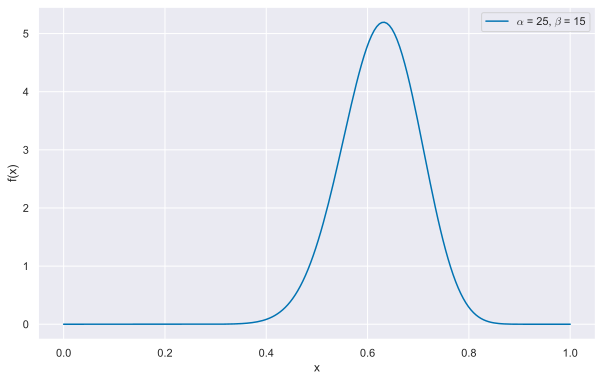

In [15]:
x = np.linspace(0, 1, 200)
a = 25
b = 15
pdf = stats.beta.pdf(x, a, b)
plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1)
plt.show()


Vediamo ora come ottenere delle stime puntuali da tale distribuzione a posteriori. La media della distribuzione a posteriori di $\theta$ per il presente esempio è

$$
\mathbb{E}(\pi \mid y = 17) = \frac{\alpha}{\alpha + \beta} = \frac{25}{25+15} = 0.625.
$$

Una stima del massimo della probabilità a posteriori, o brevemente massimo a posteriori, MAP (da *maximum a posteriori probability*), è la moda della distribuzione a posteriori. Nel caso presente, abbiamo

$$
Mo(\pi \mid y = 17) = \frac{\alpha-1}{\alpha + \beta-2} = \frac{25-1}{25+15-2} = 0.6316.
$$

La mediana si ottiene con `.beta.ppf()`:

In [16]:
stats.beta.ppf(0.5, a, b)

0.6271031100419254

L'intervallo di credibilità simmetrico al 94% è dato dalla chiamata a `.beta.ppf()`.

In [17]:
[stats.beta.ppf(0.03, a, b), stats.beta.ppf(0.97, a, b)]

[0.4781025861696672, 0.7612890799836668]

Il calcolo precedente evidenzia l'interpretazione intuitiva dell'intervallo di credibilità. Tale intervallo, infatti, può essere interpretato nel modo seguente: possiamo attribuire una certezza soggettiva del 94% all'evento che $\theta$ assuma un valore compreso tra 0.478 e 0.761. Il valore di 0.94 corrisponde infatti all'area sottesa dalla distribuzione a posteriori nell'intervallo \[0.478, 0.761\].

$$
P(\theta \in (0.478, 0.761) \mid Y = 17) = \int_{0.478}^{0.761} f(\theta \mid y=17) d\theta = 0.94.
$$

In [18]:
betacdf = stats.beta(25,15).cdf
betacdf(0.7612890799836668) - betacdf(0.4781025861696672)

0.9400000000000001

Possiamo costruire vari intervalli di credibilità simmetrici. Ad esempio, l'intervallo di credibilità compreso tra il 25-esimo e il 75-esimo percentile:

In [19]:
[stats.beta.ppf(0.25, a, b), stats.beta.ppf(0.75, a, b)]

[0.5743877928498646, 0.6778673380880944]

In questo secondo caso, diciamo che abbiamo una certezza soggettiva a posteriori del 50% che la probabilità di depressione grave tra i pazienti clinici sia un valore compreso tra 0.57 e 0.68.

Non esiste un livello "corretto" di credibilità soggettiva. I ricercatori utilizzano livelli diversi, ad esempio il 50%, l'80% o il 94%, a seconda del contesto dell'analisi statistica. Ciascuno di questi intervalli fornisce un'immagine diversa della nostra comprensione della distribuzione a posteriori del parametro di interesse.

Non è sempre appropriato riportare l'intervallo di credibilità a code uguali. Se la distribuzione a posteriori è fortemente asimmetrica è più appropriato riportare l'intervallo di credibilità più corto (o a densità a posteriori più alta, HPD). L'intervallo HPD risulta più semplice da determinare se la distribuzione a posteriori viene approssimata con il metodo MCMC.

## Probabilità della distribuzione a posteriori

Un'altra statistica di sintesi della distribuzione a posteriori riguarda il test di ipotesi Bayesiano. Supponiamo che si voglia conoscere la probabilità a posteriori che $\theta$ (probabilità di successo in una prova Bernoulliana) sia superiore a 0.5 nel caso di una distribuzione a posteriori Beta(25, 15). Per sapere quanto può essere ritenuto credibile l'evento $\theta > 0.5$ possiamo calcolare il seguente integrale:

$$
f(\theta > 0.5 \; \mid \; y = 17) = \int_{0.5}^{1}f(\theta \mid y=17)d\theta \;,
$$

dove $f(\cdot)$ è la distribuzione Beta(25, 15). 

È facile trovare questo valore con Python.

In [20]:
# Parametri della distribuzione Beta
alpha = 25
beta = 15

# Calcoliamo la probabilità P(theta < 0.5) utilizzando la funzione cdf 
probability = stats.beta.cdf(0.5, alpha, beta)

# La probabilità P(theta < 0.5) è data da 1 - P(theta > 0.5)
probability_less_than_0_5 = 1 - probability

print(f"La probabilità P(theta < 0.5) per una Beta(25, 15) è: {probability_less_than_0_5:.4f}")

La probabilità P(theta < 0.5) per una Beta(25, 15) è: 0.9459


## Commenti e considerazioni finali 

In questo capitolo sono stati introdotti i concetti fondamentali per sintetizzare l'informazione contenuta nella distribuzione a posteriori. Due strumenti cruciali sono gli intervalli di credibilità e le stime puntuali.

Gli intervalli di credibilità rappresentano un intervallo di valori all'interno del quale si ritiene con un determinato livello di probabilità soggettiva che il parametro incognito sia compreso. Essi forniscono una misura dell'incertezza riguardo al parametro e consentono di esprimere il grado di fiducia soggettiva riguardo ai possibili valori del parametro dopo l'analisi dei dati.

Le stime puntuali, invece, rappresentano una singola stima numerica del parametro incognito. Sono ottenute mediante statistiche descrittive come media, mediana o moda a posteriori, fornendo un valore rappresentativo del parametro stimato sulla base dei dati osservati.

Entrambi questi concetti sono fondamentali per sintetizzare e interpretare la distribuzione a posteriori, consentendo di trarre conclusioni supportate dalle evidenze ottenute dall'inferenza statistica bayesiana.

## Watermark

In [1]:
%watermark -n -u -v -iv -w

Last updated: Sat Jul 22 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.12.0

Watermark: 2.4.3

